# Clasificación con máquina de vectores de soporte y redes de neuronas

Alumno: Garcia Zambrano Gabriel  
Materia: Machine Learning

PARTE 1: CLASIFICACIÓN CON MÁQUINA DE VECTORES DE SOPORTE

In [1]:
##Importamos librerias:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
##importamos librerías
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score

2023-03-13 17:06:52.113140: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 17:06:52.214511: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-13 17:06:52.214527: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-13 17:06:52.612826: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
##Importamos dataset
train=pd.read_csv("train.csv") ##datos de entrenamiento
test=pd.read_csv("test.csv")
print(test.keys())
print(train.keys())

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [3]:
print(train.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [4]:
##Cargar el conjunto de datos en un DataFrame de Pandas
data = pd.read_csv('train.csv')
# Seleccionar solo las variables numéricas
numeric_vars = data.select_dtypes(include=['int64', 'float64'])
# Describir las variables numéricas
print(numeric_vars.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

<AxesSubplot:>

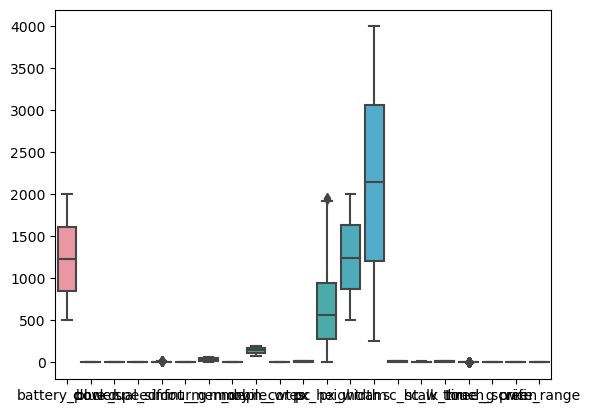

In [5]:
# Seleccionar solo las variables numéricas
numeric_vars = train.select_dtypes(include=['int64', 'float64'])
# Crear un diagrama de caja y bigotes
sns.boxplot(data=numeric_vars)

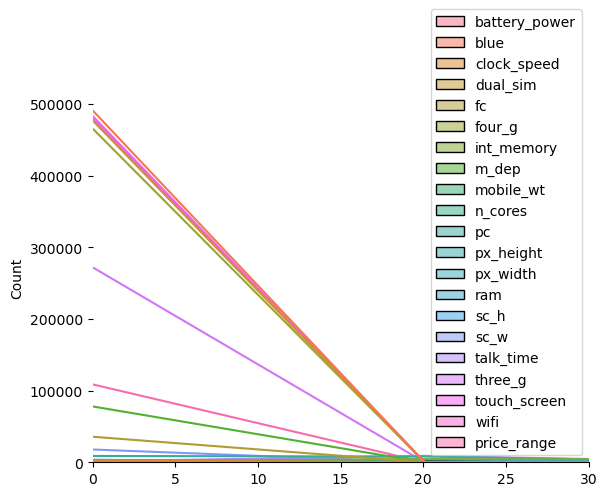

In [6]:
# Leer el conjunto de datos
train = pd.read_csv("train.csv")
# Seleccionar solo las variables numéricas
numeric_vars = train.select_dtypes(include=['int64', 'float64'])
# Generar histogramas para cada variable numérica
sns.histplot(data=numeric_vars, kde=True, bins=30)
# Mostrar la figura
sns.set_style("whitegrid")
sns.despine(left=True)
plt.xlim(0, 30)
# Mostrar la figura
plt.show()

Realizamos matriz de correlación de los datos:

<AxesSubplot:>

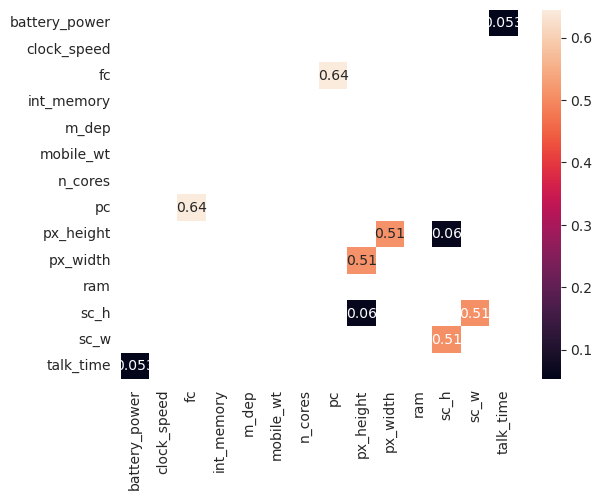

In [7]:
# Seleccionar las columnas con variables continuas y numéricas
continuous_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
numeric_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
# Crear un nuevo dataframe solo con las columnas continuas y numéricas
continuous_df = train[continuous_columns]
# Calcular la matriz de correlación de Pearson
corr_matrix = continuous_df.corr()
# Máscara para seleccionar los valores mayores a 0.05
mask = (abs(corr_matrix) > 0.05) & (corr_matrix < 1)
# Aplicar la máscara a la matriz de correlación
corr_matrix_masked = corr_matrix[mask]
# Visualizar la matriz de correlación utilizando un mapa de calor
sns.heatmap(corr_matrix_masked, annot=True)

In [8]:
# Leer los conjuntos de entrenamiento y prueba desde archivos CSV
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
# Dividir los conjuntos de datos en características y etiquetas
X_train = train_data.drop("price_range", axis=1)
y_train = train_data["price_range"]
X_test = test_data.drop("id", axis=1)
# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Crear un clasificador SVM y entrenarlo con el conjunto de entrenamiento
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
# Calcular la precisión de la predicción
accuracy = accuracy_score(y_val, y_pred)
print("Precisión de la predicción: {:.2f}%".format(accuracy * 100))
# Predecir las etiquetas para el conjunto de prueba
y_test_pred = clf.predict(X_test)
# Guardar las predicciones en un archivo CSV
test_data["price_range"] = y_test_pred
test_data[["id", "price_range"]].to_csv("predicted_prices.csv", index=False)


Precisión de la predicción: 97.00%


In [9]:
from sklearn.metrics import confusion_matrix

# Creación del modelo
model = SVC()

# Definición de los parámetros a ajustar
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Ajuste de los parámetros utilizando la técnica de validación cruzada
grid = GridSearchCV(model, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Predicción utilizando el modelo ajustado
y_pred = grid.predict(X_val)

# Calcular la precisión de la predicción
accuracy = accuracy_score(y_val, y_pred)
print("Precisión de la predicción: {:.2f}%".format(accuracy * 100))

# Predicción para el conjunto de prueba
y_test = grid.predict(X_test)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_val, y_pred)
print("Matriz de confusión:")
print(conf_mat)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.256 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.256 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.972 total time=   1.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.959 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   1.6s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.959 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

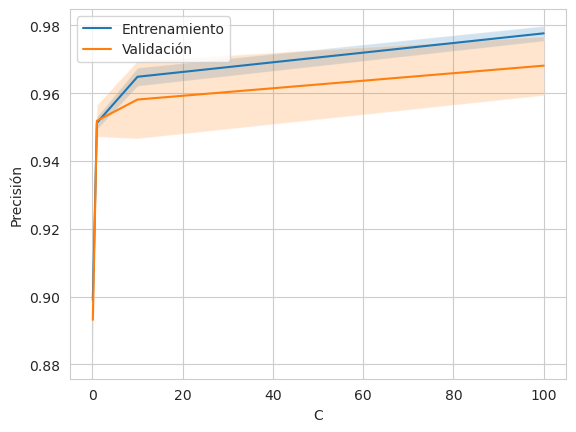

In [10]:
from sklearn.model_selection import validation_curve

# Creación del modelo
model = SVC()

# Definición de los parámetros a ajustar
param_range = [0.1, 1, 10, 100]
param_name = 'C'

# Validación cruzada para obtener las curvas de validación y entrenamiento
train_scores, test_scores = validation_curve(model, X_train, y_train,
                                             param_name=param_name,
                                             param_range=param_range,
                                             cv=5)

# Cálculo de las medias y desviaciones estándar de las curvas de validación y entrenamiento
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas de validación y entrenamiento
plt.plot(param_range, train_mean, label="Entrenamiento")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(param_range, test_mean, label="Validación")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel(param_name)
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.show()

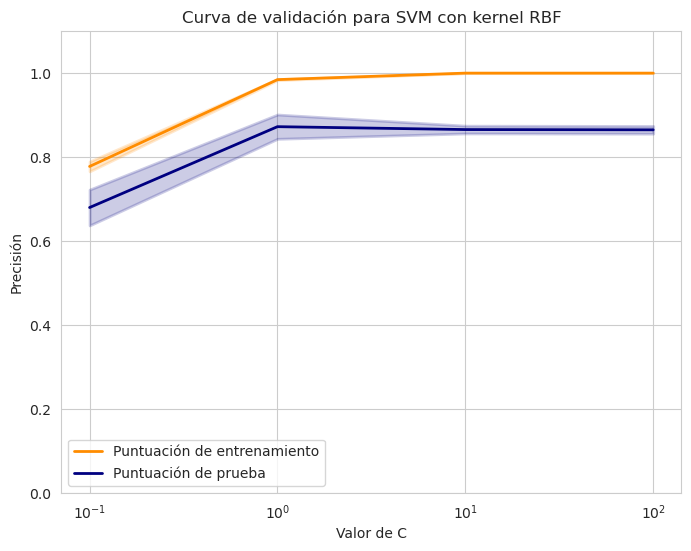

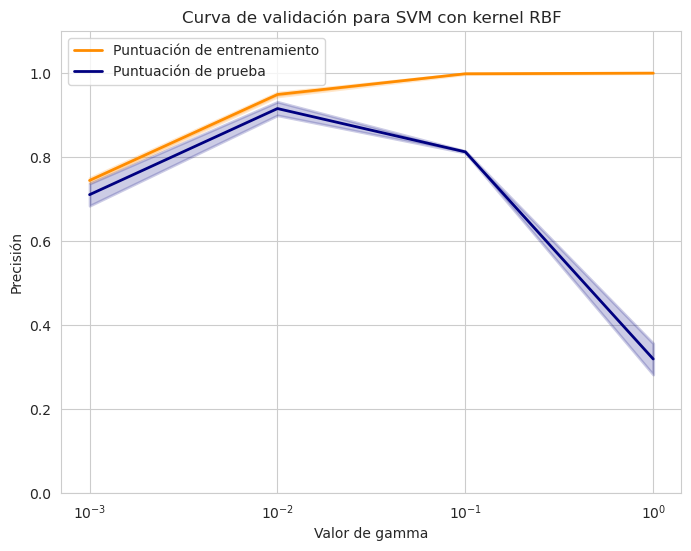

In [21]:
from sklearn.model_selection import validation_curve

# Definición de los valores para los parámetros que se van a ajustar
param_range_C = [0.1, 1, 10, 100]
param_range_gamma = [1, 0.1, 0.01, 0.001]

# Calcular la curva de validación para cada hiperparámetro
train_scores, test_scores = validation_curve(
    SVC(), X_train, y_train, param_name="C", param_range=param_range_C,
    cv=5, scoring="accuracy", n_jobs=-1)

train_scores2, test_scores2 = validation_curve(
    SVC(), X_train, y_train, param_name="gamma", param_range=param_range_gamma,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calcular el promedio y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

train_mean2 = np.mean(train_scores2, axis=1)
train_std2 = np.std(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)

# Graficar la curva de validación para C
plt.figure(figsize=(8, 6))
plt.title("Curva de validación para SVM con kernel RBF")
plt.xlabel("Valor de C")
plt.ylabel("Precisión")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range_C, train_mean, label="Puntuación de entrenamiento",
             color="darkorange", lw=lw)
plt.fill_between(param_range_C, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range_C, test_mean, label="Puntuación de prueba",
             color="navy", lw=lw)
plt.fill_between(param_range_C, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

# Graficar la curva de validación para gamma
plt.figure(figsize=(8, 6))
plt.title("Curva de validación para SVM con kernel RBF")
plt.xlabel("Valor de gamma")
plt.ylabel("Precisión")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range_gamma, train_mean2, label="Puntuación de entrenamiento",
             color="darkorange", lw=lw)
plt.fill_between(param_range_gamma, train_mean2 - train_std2,
                 train_mean2 + train_std2, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range_gamma, test_mean2, label="Puntuación de prueba",
             color="navy", lw=lw)
plt.fill_between(param_range_gamma, test_mean2 - test_std2,
                 test_mean2 + test_std2, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

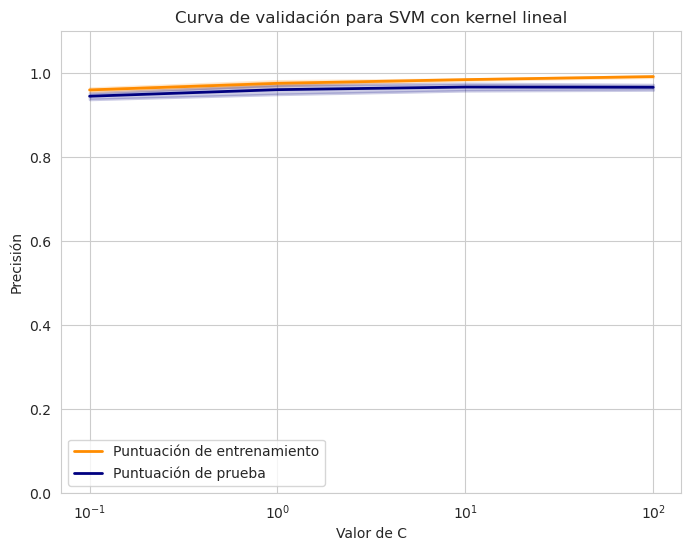

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# Definición de los valores para los parámetros que se van a ajustar
param_range_C = [0.1, 1, 10, 100]

# Calcular la curva de validación para C
train_scores, test_scores = validation_curve(
    SVC(kernel='linear'), X_train, y_train, param_name="C", param_range=param_range_C,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calcular el promedio y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de validación para C
plt.figure(figsize=(8, 6))
plt.title("Curva de validación para SVM con kernel lineal")
plt.xlabel("Valor de C")
plt.ylabel("Precisión")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range_C, train_mean, label="Puntuación de entrenamiento",
             color="darkorange", lw=lw)
plt.fill_between(param_range_C, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range_C, test_mean, label="Puntuación de prueba",
             color="navy", lw=lw)
plt.fill_between(param_range_C, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()



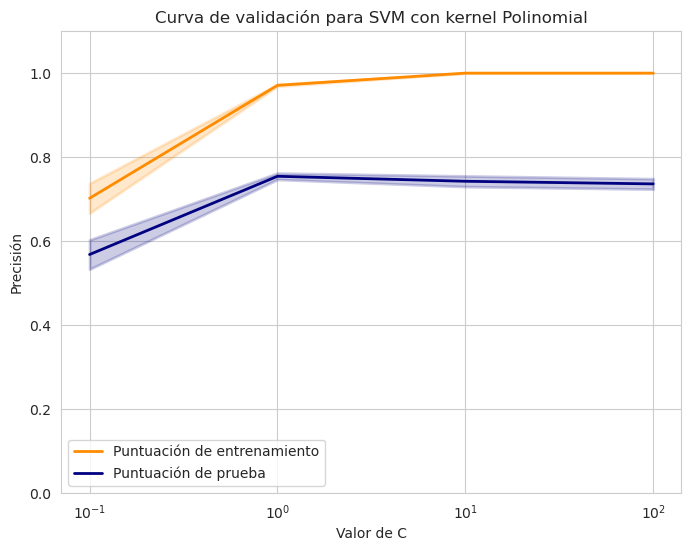

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# Definición de los valores para los parámetros que se van a ajustar
param_range_C = [0.1, 1, 10, 100]

# Calcular la curva de validación para C
train_scores, test_scores = validation_curve(
    SVC(kernel='poly'), X_train, y_train, param_name="C", param_range=param_range_C,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calcular el promedio y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de validación para C
plt.figure(figsize=(8, 6))
plt.title("Curva de validación para SVM con kernel Polinomial")
plt.xlabel("Valor de C")
plt.ylabel("Precisión")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range_C, train_mean, label="Puntuación de entrenamiento",
             color="darkorange", lw=lw)
plt.fill_between(param_range_C, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range_C, test_mean, label="Puntuación de prueba",
             color="navy", lw=lw)
plt.fill_between(param_range_C, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

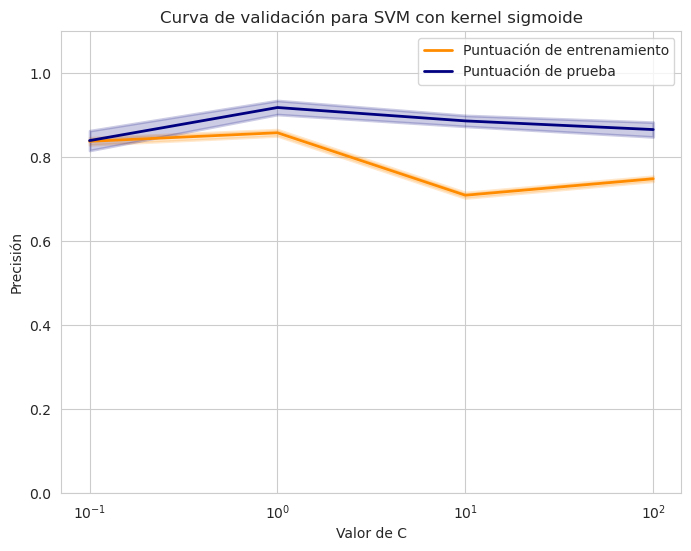

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# Definición de los valores para los parámetros que se van a ajustar
param_range_C = [0.1, 1, 10, 100]

# Calcular la curva de validación para C
train_scores, test_scores = validation_curve(
    SVC(kernel='sigmoid'), X_train, y_train, param_name="C", param_range=param_range_C,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calcular el promedio y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de validación para C
plt.figure(figsize=(8, 6))
plt.title("Curva de validación para SVM con kernel sigmoide")
plt.xlabel("Valor de C")
plt.ylabel("Precisión")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range_C, train_mean, label="Puntuación de entrenamiento",
             color="darkorange", lw=lw)
plt.fill_between(param_range_C, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range_C, test_mean, label="Puntuación de prueba",
             color="navy", lw=lw)
plt.fill_between(param_range_C, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# SEGUNDA PARTE: CLASIFICACIÓN CON REDES NEURONALES

In [15]:
# Lectura de los archivos CSV
data = pd.read_csv("train.csv")
scaler = StandardScaler()
X = scaler.fit_transform(data.drop("price_range", axis=1))

y = data["price_range"]

# División del dataset en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación del modelo de red neuronal
model = Sequential()

# Añadir capas ocultas
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Añadir capa de salida
model.add(Dense(4, activation='softmax'))

# Compilación del modelo
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenamiento del modelo
early_stop = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_split=0.1, callbacks=[early_stop])

# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Precisión: %.2f' % (accuracy*100))

Epoch 1/200


2023-03-13 17:18:29.403898: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-13 17:18:29.403917: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-13 17:18:29.403930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gavinci-B550M-DS3H): /proc/driver/nvidia/version does not exist
2023-03-13 17:18:29.404081: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


12/12 [==============================] - 0s 12ms/step - loss: 2.9143 - accuracy: 0.2576 - val_loss: 2.6777 - val_accuracy: 0.2438
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 2.8570 - accuracy: 0.2507 - val_loss: 2.6637 - val_accuracy: 0.2500
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 2.8583 - accuracy: 0.2438 - val_loss: 2.6507 - val_accuracy: 0.2438
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 2.8240 - accuracy: 0.2403 - val_loss: 2.6387 - val_accuracy: 0.2375
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 2.7908 - accuracy: 0.2514 - val_loss: 2.6277 - val_accuracy: 0.2313
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 2.7946 - accuracy: 0.2417 - val_loss: 2.6167 - val_accuracy: 0.2375
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 2.7521 - accuracy: 0.2667 - val_loss: 2.6059 - val_accuracy: 0.2438
Epoch 8/200
12/12 [=====

In [16]:
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

data = pd.read_csv("train.csv")
scaler = StandardScaler()
X = scaler.fit_transform(data.drop("price_range", axis=1))
y = data["price_range"]

# Crear el modelo
model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=128, verbose=0)

# Validación cruzada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold)

print("Precisión promedio: %.2f%%" % (results.mean()*100))

/tmp/ipykernel_122845/1950703141.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=128, verbose=0)


Precisión promedio: 85.50%


In [17]:
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    optimizer = Adam(learning_rate=0.0005)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

data = pd.read_csv("train.csv")
scaler = StandardScaler()
X = scaler.fit_transform(data.drop("price_range", axis=1))
y = data["price_range"]

# Validación cruzada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el modelo
model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=128, verbose=0)

results = cross_val_score(model, X, y, cv=kfold)

print("Precisión promedio: %.2f%%" % (results.mean()*100))

/tmp/ipykernel_122845/4171429106.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=128, verbose=0)


Precisión promedio: 93.40%


In [19]:

def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    optimizer = Adam(learning_rate=0.0005)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

data = pd.read_csv("train.csv")
scaler = StandardScaler()
X = scaler.fit_transform(data.drop("price_range", axis=1))
y = data["price_range"]

# Validación cruzada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el modelo
model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=64, verbose=0)

results = cross_val_score(model, X, y, cv=kfold)

print("Precisión promedio: %.2f%%" % (results.mean()*100))

/tmp/ipykernel_122845/4181710883.py:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=64, verbose=0)


Precisión promedio: 94.45%


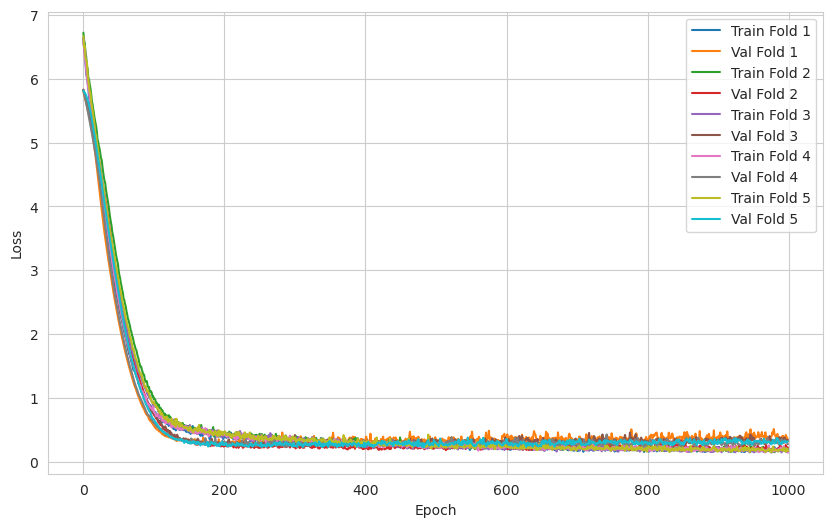

In [20]:
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    optimizer = Adam(learning_rate=0.0005)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Return the history object for the trained model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=64, verbose=0)
    return history

histories = []
for train_idx, val_idx in kfold.split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]
    history = create_model()
    histories.append(history)

# Plot the training and validation loss for each epoch across all folds
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label='Train Fold {}'.format(i+1))
    plt.plot(history.history['val_loss'], label='Val Fold {}'.format(i+1))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()